In [ ]:
import os
import tensorflow as tf
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
from keras.layers import Conv2D, Conv3D, Flatten, Dense, Reshape, BatchNormalization
from keras.layers import Dropout, Input
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, Conv3D, MaxPooling3D, MaxPooling2D, Conv2DTranspose, Flatten, Dense, BatchNormalization
from keras.layers.core import Dropout
from keras.optimizers import Adam,SGD, RMSprop
from keras.callbacks import ModelCheckpoint
from keras import backend as K
def get_model():
##INPUTS
    inputs1 = Input((192, 192, 4)) #Multispectral
    inputs2 = Input((512, 512, 1)) #Panchromatic

##Block 1

    conv1 = Conv2D(16, (2, 2), activation='swish', padding='same')(inputs1)
    # conv1 = Conv2D(16, (2, 2), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(3, 3))(conv1) #64
     

    conv2 = Conv2D(32, (2, 2), activation='swish', padding='same')(pool1)
    # conv2 = tf.keras.activations.swish( conv2 )
    # conv2 = Conv2D(32, (2, 2), activation='relu', padding='same')(conv2)
    # conv2 = Dropout(0.1)(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #32

    conv3 = Conv2D(64, (2, 2),activation='swish', padding='same')(pool2)
    # conv3 = tf.keras.activations.swish( conv3 )
    # conv3 = Dropout(0.1)(conv3)
    #pool3 = MaxPooling2D(pool_size=(2, 2))(conv3) #32

    conv4 = Conv2D(128, (2, 2), activation='swish', padding='same')(conv3)

    # conv4 = Conv2D(32, (1, 1), activation='relu')(conv4)
    # conv4 = Dropout(0.1)(conv4)
    
    # flat5 = Flatten()(conv4)
    # output_1 = Dense(1024, activation='relu', name='output_1')(flat5)


##BLOCK 2

    conv5 = Conv2D(16, (3, 3), activation='swish', padding='same')(inputs2)
    # conv5 = tf.keras.activations.swish( conv5 )
    # conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv5)
    pool5 = MaxPooling2D(pool_size=(2, 2))(conv5) # 256

    conv6 = Conv2D(32, (3, 3),activation='swish', padding='same')(pool5)
    # conv6 = tf.keras.activations.swish( conv6 )
    # conv6 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv6)
    # conv6 = Dropout(0.1)(conv6)
    pool6 = MaxPooling2D(pool_size=(2, 2))(conv6) #128

    conv7 = Conv2D(64, (3, 3),activation='swish', padding='same')(pool6)
    # conv7 = tf.keras.activations.swish( conv7 )
    # conv7 = Dropout(0.1)(conv7)
    pool7 = MaxPooling2D(pool_size=(2, 2))(conv7) #64

    conv8 = Conv2D(128, (3, 3), activation='swish', padding='same')(pool7)
    # conv8 = Dropout(0.1)(conv8)
    # conv8 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv8)
    pool8 = MaxPooling2D(pool_size=(2, 2))(conv8) #32

    # conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv8)
    # # conv8 = Dropout(0.1)(conv8)
    # conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)
    
    # flat9 = Flatten()(conv8)
    # output_2 = Dense(1024, activation='relu', name='output_2')(flat9)


##Combine Block1 and Block2

    up10 = concatenate([conv4, pool8], axis = 3)

    #conv11 = Reshape((32 , 32, 2))(up10)
    conv11 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(up10), conv8, conv2], axis=3)
    #conv11 = Conv2DTranspose(128, (2,2), strides = (2,2), padding = 'same')(up10) #64
    conv11 = Conv2D(128, (3, 3), activation='swish', padding='same')(conv11)
    # conv11 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv11)
    # conv11 = Dropout(0.1)(conv11)

    conv12 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv11), conv7], axis=3) #128
    conv12 = Conv2D(64, (3, 3), activation='swish', padding='same')(conv12)
    # conv12 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv12)
    # conv12 = Dropout(0.1)(conv12)

    conv13 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv12), conv6], axis=3)
    conv13 = Conv2D(32, (3, 3), activation='swish', padding='same')(conv13)
     #conv13 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv13)

    conv14 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv13), conv5], axis=3) #512
    conv14 = Conv2D(32, (3, 3), activation='swish', padding='same')(conv14)
    # conv14 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv14)

    output_3 = Conv2D(4, (1, 1), activation='relu', name='output_3')(conv14)

    model = Model(inputs=[inputs1 ,inputs2], outputs=[ output_3])

    model.compile(optimizer=Adam(lr=0.0005), loss={'output_3': 'mean_squared_error'}, metrics=['accuracy'])

    return model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = get_model()

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 512, 512, 16) 160         input_4[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 192, 192, 4) 0                                            
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 256, 256, 16) 0           conv2d_12[0][0]                  
______________________________________________________________________________________________

In [ ]:
xa = []
xb =[]
xc = []

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import cv2
a = cv2.imread('/content/drive/MyDrive/pan/r14.png')
b = cv2.imread('/content/drive/MyDrive/multi/m14.png')
c = cv2.imread('/content/drive/MyDrive/fused/s14.png')
#c = cv2.resize(c,(256,256))
xa.append(a)
#xa.pop(0)
#xa.pop(2)

xb.append(b)
#xb.pop(0)
#xb.pop(2)

xc.append(c)
#xc.pop(0)
#xc.pop(2)
#print(xa)

In [ ]:
print(xc)

In [ ]:
xa = np.array(xa, dtype='float32')
xb = np.array(xb, dtype='float32')
xc = np.array(xc, dtype='float32')

In [ ]:
xa=xa/255
xb=xb/255
xc=xc/255

In [ ]:
xa = xa.astype('float32')
mean = np.mean(xa)  # mean for data centering
std = np.std(xa)  # std for data normalization

xa -= mean
xa /= std

xa = xa.astype('float32')
print(xa)

In [ ]:
xb = xb.astype('float32')
mean = np.mean(xb)  # mean for data centering
std = np.std(xb)  # std for data normalization

xb -= mean
xb /= std

xb = xb.astype('float32')
print(xb)

In [ ]:
xc = xc.astype('float32')
mean = np.mean(xc)  # mean for data centering
std = np.std(xc)  # std for data normalization

xc -= mean
xc /= std

xc = xc.astype('float32')
print(xc)

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/chkpt_n.hdf5',
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.load_weights('/content/chkpt_n (1).hdf5')

In [ ]:
model.fit(x=[train_multi,train_pan], y=train_output, batch_size=1, epochs=500) #5000

Epoch 1/500
361/361 [==============================] - 47s 34ms/step - loss: 41128.1051 - accuracy: 0.5868
Epoch 2/500
361/361 [==============================] - 12s 34ms/step - loss: 1198.4066 - accuracy: 0.6414
Epoch 3/500
361/361 [==============================] - 13s 35ms/step - loss: 377.7705 - accuracy: 0.8094
Epoch 4/500
361/361 [==============================] - 13s 35ms/step - loss: 331.8845 - accuracy: 0.7963
Epoch 5/500
361/361 [==============================] - 13s 35ms/step - loss: 289.8032 - accuracy: 0.7955
Epoch 6/500
361/361 [==============================] - 13s 36ms/step - loss: 233.7829 - accuracy: 0.8324
Epoch 7/500
361/361 [==============================] - 13s 36ms/step - loss: 117.2324 - accuracy: 0.8910
Epoch 8/500
361/361 [==============================] - 13s 35ms/step - loss: 86.5241 - accuracy: 0.9100
Epoch 9/500
361/361 [==============================] - 13s 35ms/step - loss: 93.7576 - accuracy: 0.8981
Epoch 10/500
361/361 [==============================] 

KeyboardInterrupt: ignored

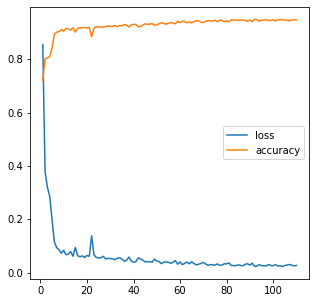

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#loss_df = pd.DataFrame(model.history.history)
loss_df[1:].plot(figsize=(5,5))

In [ ]:
loss_df['loss'] =  loss_df['loss'].map(lambda name: name/1000)

In [ ]:
loss_df

,loss,accuracy
0,22.584119,0.587054
1,0.855079,0.720032
2,0.377343,0.801412
3,0.320359,0.805080
4,0.285574,0.810646
...,...,...
106,0.028124,0.946702
107,0.030200,0.944003
108,0.027803,0.947579
109,0.025164,0.947360


In [ ]:
pred = model.predict([np.array([xb[3]]),np.array([xa[3]])])

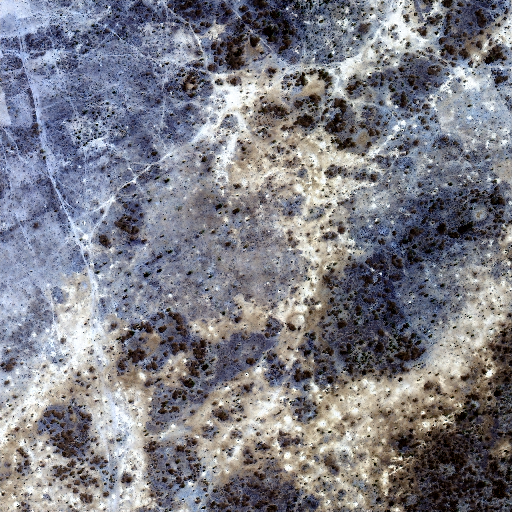

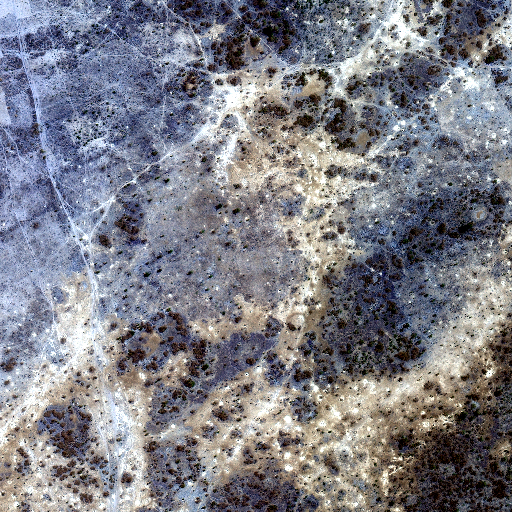

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(pred[0])
cv2_imshow(xc[3])


In [ ]:
from zipfile import ZipFile
import tifffile as tiff 

In [ ]:
# Create a ZipFile Object and load sample.zip in it
with ZipFile('/content/drive/MyDrive/Team 3 - Navya, Sanjana, Nisarg, Nishchal/DATA_FUSION/CARTO_PAN_MX.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
# Create a ZipFile Object and load sample.zip in it
with ZipFile('/content/drive/MyDrive/Team 3 - Navya, Sanjana, Nisarg, Nishchal/DATA_FUSION/fused_image.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
pan = tiff.imread("/content/CARTO_PAN_0.6M.tif")

In [ ]:
pan.shape

(10001, 10001)

In [ ]:
multi = tiff.imread("/content/CARTO_MX_1.6M.tif")
multi.shape

(3751, 3751, 4)

In [ ]:
output = tiff.imread("/content/fused_image/output.tif")
output.shape

(10001, 10001, 4)

In [ ]:
512/2.6666

192.004800120003

In [ ]:
10001/512

19.533203125

In [ ]:
3751/192

19.536458333333332

In [ ]:
192*19

3648

In [ ]:
512*19

9728

In [ ]:
import cv2
pan_r = cv2.resize(pan,(9728,9728)) 

In [ ]:
pan_r.shape

(9728, 9728)

In [ ]:
multi_r = cv2.resize(multi,(3648,3648)) 

In [ ]:
multi_r.shape

(3648, 3648, 4)

In [ ]:
output_r = cv2.resize(output,(9728,9728)) 
output_r.shape

(9728, 9728, 4)

In [ ]:
train_pan = []
train_multi = []
train_output = []
for i in range(19):
  for j in range(19):
    x = pan_r[i*512:(i+1)*512, j*512:(j+1)*512]
    y = multi_r[i*192:(i+1)*192, j*192:(j+1)*192]
    z = output_r[i*512:(i+1)*512, j*512:(j+1)*512]
    train_pan.append(x)
    train_multi.append(y)
    train_output.append(z)


In [ ]:
import numpy as np
train_pan = np.array(train_pan, dtype="float32")
train_multi = np.array(train_multi, dtype="float32")
train_output = np.array(train_output, dtype="float32")

In [ ]:
train_pan = np.expand_dims(train_pan, axis=3)
train_pan.shape

(361, 512, 512, 1)

In [ ]:
train_multi.shape

(361, 192, 192, 4)

In [ ]:
train_output.shape

(361, 512, 512, 4)

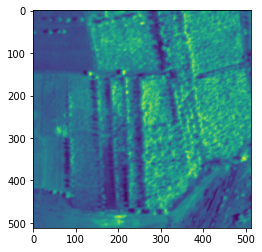

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_output[0][:,:,3])

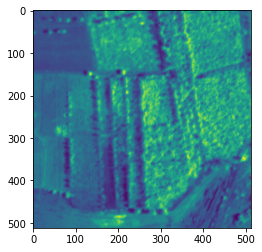

In [ ]:
plt.imshow(model.predict([np.array([train_multi[0]]),np.array([train_pan[0]])])[0][:,:,3])

In [ ]:
import time
  
# Get the current processor
# time in seconds
pro_time = time.clock()
print(pro_time)
output_pred = []
for i in range(361):
  output_pred.append(model.predict([np.array([train_multi[i]]),np.array([train_pan[i]])])[0])
pro_time = time.clock()
print(pro_time)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


22.861656
41.61864


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
output_pred = np.array(output_pred)

In [ ]:
output_pred.shape

(361, 512, 512, 4)

In [ ]:
#Function for doing it on large image
k=0
for i in range(0,9728,512):
    x=[[]]
    for j in range(0,9728,512):
        if(j==0):
            x=output_pred[k]
            k+=1
            #x=imgs_mask_test
            continue
        x = cv2.hconcat([x,output_pred[k]])
        k+=1
    if(i==0):
        y=x
    else:
        y = np.vstack((y,x))

In [ ]:
y = np.array(y)

In [ ]:
y.shape

(9728, 9728, 4)

In [ ]:
tiff.imwrite("/content/drive/MyDrive/Team 3 - Navya, Sanjana, Nisarg, Nishchal/DATA_FUSION/pred_pansharp.tif", y)

In [ ]:
v = tiff.imread("/content/drive/MyDrive/Team 3 - Navya, Sanjana, Nisarg, Nishchal/DATA_FUSION/pred_pansharp.tif")

In [ ]:
import cv2
v = cv2.resize(v,(512,512))

In [ ]:
v.shape

(512, 512, 4)

(<Figure size 988.8x604.8 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f5d2605db10>)

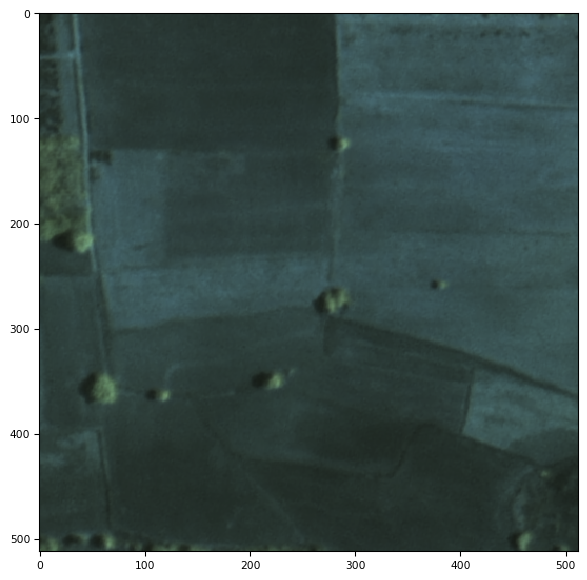

In [ ]:
tiff.imshow(v[:,:,1:4])

In [ ]:
w = model.predict([np.array([train_multi[4]]),np.array([train_pan[4]])])[0]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))